## Zadanie 1

In [1]:
import pygad
import numpy
import math
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
#def endurance(x, y, z, u, v, w):
#     return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

In [3]:
def endurance(A):
     return math.exp(-2*(A[1]-math.sin(A[0]))**2)+math.sin(A[2]*A[3])+math.cos(A[4]*A[5])

In [4]:
A=[]

In [5]:
#definiujemy parametry stopu
#metale to liczby: [0,1)
gene_space = {'low': 0, 'high': 1}

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    return endurance(solution)

fitness_function = fitness_func

#ile stopów w populacji
#ile metali ma stop
sol_per_pop = 10
num_genes = 6

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent przedmiotów?
#trzeba pamietac ile metali ma stop
mutation_type = "random"
mutation_percent_genes = 17 # czyli 1 przedmiot się zmieni

In [6]:
czasy = []
for i in range(10):
    start = time.time()

    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes)

    #uruchomienie algorytmu
    ga_instance.run()
    
    end = time.time()
    czas = end - start
    czasy.append(czas)
print(numpy.mean(czasy))

0.013110184669494629


In [7]:
#podsumowanie: najlepsze znalezione rozwiazanie (stop + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0.95253125 0.76910945 0.98976269 0.99348986 0.06145929 0.09078618]
Fitness value of the best solution = 2.8281440125726736


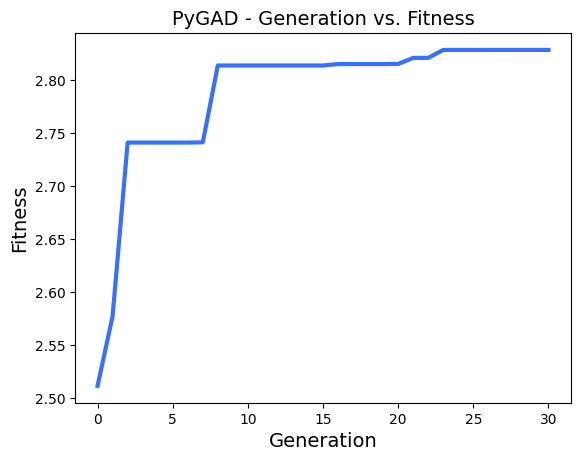

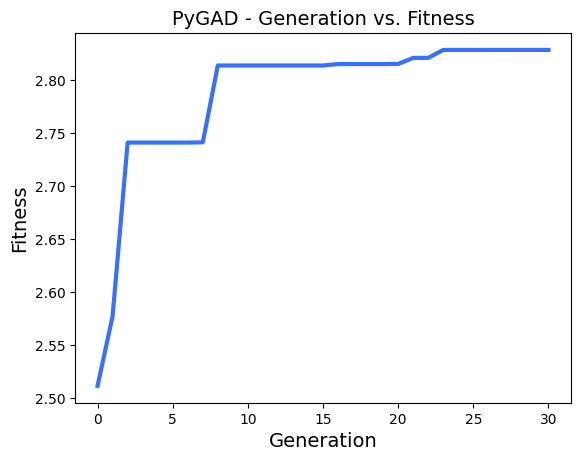

In [8]:
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

## Zadanie 2

In [9]:
# 0 - pole, 1 - ściana, 2 - start, 3 - koniec
r1 = [1 for i in range(12)]
r2 = [1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
r3 = [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]
r4 = [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
r5 = [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
r6 = [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
r7 = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
r8 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]
r9 = [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
r10 = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
r11 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1]
r12 = [1 for i in range(12)]
labirynt = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12]
labirynt

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [10]:
#definiujemy parametry ścieżki
#ruchy to liczby: 0 - lewo, 1 - góra, 2 - prawo, 3 - dół
gene_space = [0, 1, 2, 3]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    x = 1
    y = 1
    endx = 10
    endy = 10
    for i in range(30):
        if solution[i] == 0: # w lewo
            if labirynt[y][x-1] != 1:
                x = x-1
                if x == endx and y == endy:
                    return 0
        elif solution[i] == 1: # w górę
            if labirynt[y-1][x] != 1:
                y = y-1
                if x == endx and y == endy:
                    return 0
        elif solution[i] == 2: # w prawo
            if labirynt[y][x+1] != 1:
                x = x+1
                if x == endx and y == endy:
                    return 0
        elif solution[i] == 3: # w dół
            if labirynt[y+1][x] != 1:
                y = y+1
                if x == endx and y == endy:
                    return 0
    return -(abs(x-endx)+abs(y-endy))

fitness_function = fitness_func

#ile ścieżek w populacji
#ile ruchów ma ścieżka
sol_per_pop = 1000
num_genes = 30

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 500
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent gprzedmiotów?
#trzeba pamietac ile ruchów ma ścieżka
mutation_type = "random"
mutation_percent_genes = 4 # czyli 1 przedmiot się zmieni

In [11]:
czasy = []
for i in range(10):
    start = time.time()

    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria='reach_0')

    #uruchomienie algorytmu
    ga_instance.run()
    
    end = time.time()
    czas = end - start
    czasy.append(czas)
print(numpy.mean(czasy))

1.4845753192901612


In [12]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))

Number of generations passed is : 12


In [13]:
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
#0 - lewo, 1 - góra, 2 - prawo, 3 - dół
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [1. 0. 1. 2. 3. 2. 3. 2. 2. 1. 2. 2. 1. 3. 3. 3. 2. 2. 3. 3. 2. 2. 2. 3.
 2. 3. 3. 3. 2. 2.]
Fitness value of the best solution = 0


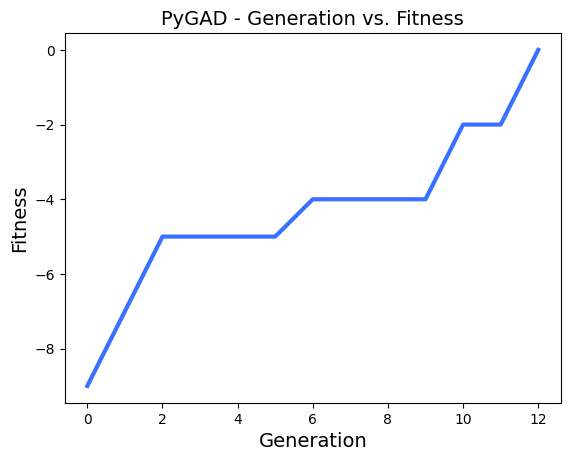

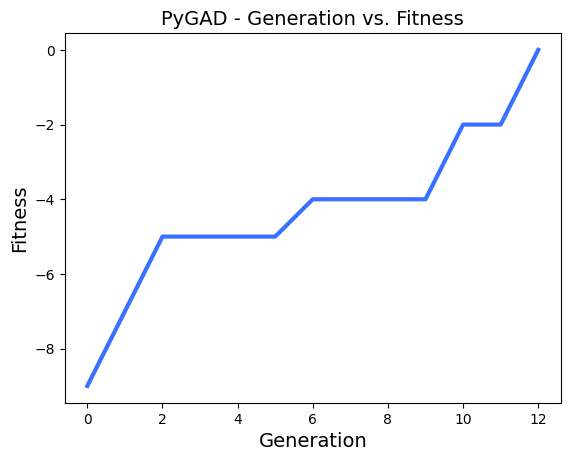

In [14]:
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

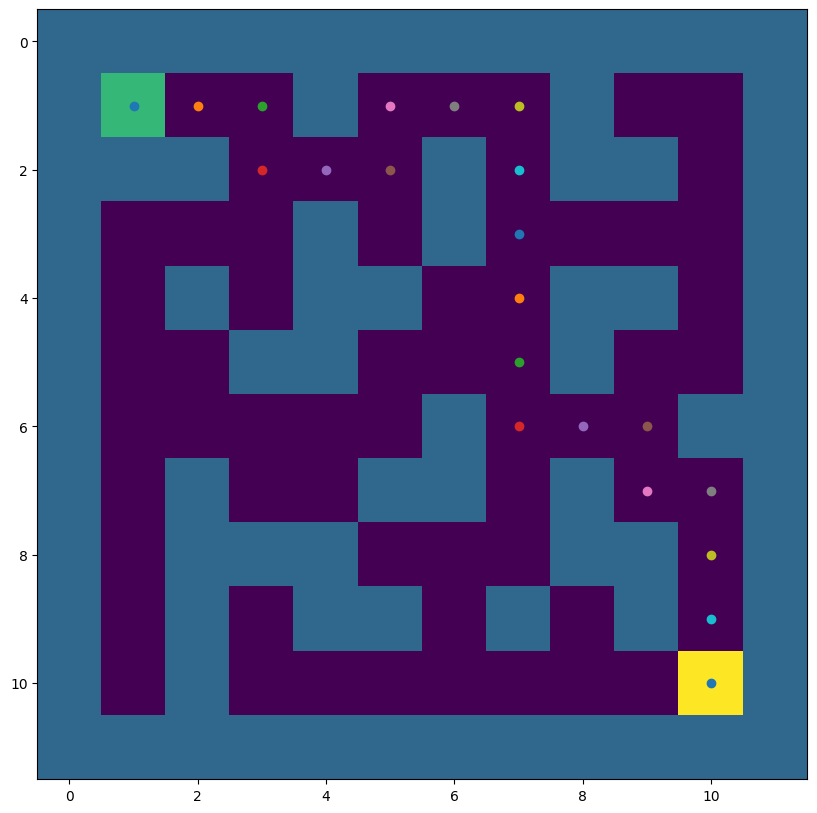

In [15]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(labirynt)
plt.scatter(1, 1)
x=1
y=1
for i in range(len(solution)):
    if solution[i] == 0: # w lewo
        if labirynt[y][x-1] != 1:
            x = x-1
            plt.scatter(x, y)        
    elif solution[i] == 1: # w górę
        if labirynt[y-1][x] != 1:
            y = y-1
            plt.scatter(x, y)         
    elif solution[i] == 2: # w prawo
        if labirynt[y][x+1] != 1:
            x = x+1
            plt.scatter(x, y)      
    elif solution[i] == 3: # w dół
        if labirynt[y+1][x] != 1:
            y = y+1
            plt.scatter(x, y)
plt.show()